In [0]:
#@title 
%%html
<marquee style='width: 100%; color: #00a7f4;font-size:30px;'><b>Welcome to Mentorskool!</b></marquee>

### **Data Ingestion - Learning to scrape the web**
-----
We'll be doing the following activities in this class :

* Learning to web scrape : Follow along project
* Discussion with your guide on learnings and shortcomings
* Work on a lab assignment to assess what your learnt!

### **Learning Outcomes**
-----
Below are the takeaways from this notebook :

* Learning how to read an **HTML page** (DOM or **Document Object Model**)
* How can Python be used to **read** an HTML page and **extract data** from the same
* Discovering the **packages** which Python uses to implement **Web Scraping**


### **01. Learning to web scrape : Follow along project**
--------------------------------
* Follow the article [here](https://www.dataquest.io/blog/web-scraping-beautifulsoup/) by DataQuest end-to-end and try to replicate the results as shown <br>
  🚩 Please ensure you **type out** each piece of code instead of doing **copy-paste**. You'll discover how quickly you learn if you try **remembering** and then **typing**!
* Use this notebook itself to write the code
* For each piece of your code, you need to provide sufficient comments to explain what the step would do
* Once you are done, submit your assignment in the classroom


# **What is Web Scraping?**
Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis. 

# **What is Beautiful Soup?**
Beautiful Soup is a Python library for pulling data out of HTML and XML files.

In [0]:
# start coding below 

In [1]:
from requests import get #importing get function from request module

#This is the url of the webpage which we want to scrap 
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1' 

#Here in 'response' we have stored the webpage
response = get(url)

# now we printed the text. 
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [2]:
from bs4 import BeautifulSoup

# now with the help of html parser we will get the text file.
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

# **Html Parser**

According to wikipedia, Parsing or syntactic analysis is the process of analysing a string of symbols, either in natural language or in computer languages, according to the rules of a formal grammar. The term parsing comes from Latin pars (orationis), meaning part (of speech).

In your case, HTML parsing is basically: taking in HTML code and extracting relevant information like the title of the page, paragraphs in the page, headings in the page, links, bold text etc.
Parsers:

A computer program that parses content is called a parser. There are in general 2 kinds of parsers:

Top-down parsing- Top-down parsing can be viewed as an attempt to find left-most derivations of an input-stream by searching for parse trees using a top-down expansion of the given formal grammar rules. Tokens are consumed from left to right. Inclusive choice is used to accommodate ambiguity by expanding all alternative right-hand-sides of grammar rules.

Bottom-up parsing - A parser can start with the input and attempt to rewrite it to the start symbol. Intuitively, the parser attempts to locate the most basic elements, then the elements containing these, and so on. LR parsers are examples of bottom-up parsers. Another term used for this type of parser is Shift-Reduce parsing.
A few example parsers:
Top-down parsers:

    Recursive descent parser
    LL parser (Left-to-right, Leftmost derivation)
    Earley parser

Bottom-up parsers:

    Precedence parser
        Operator-precedence parser
        Simple precedence parser
    BC (bounded context) parsing
    LR parser (Left-to-right, Rightmost derivation)
        Simple LR (SLR) parser
        LALR parser
        Canonical LR (LR(1)) parser
        GLR parser
    CYK parser
    Recursive ascent parser

Example parser:

Here's an example HTML parser in python:

from HTMLParser import HTMLParser

# create a subclass and override the handler methods
class MyHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        print "Encountered a start tag:", tag
    def handle_endtag(self, tag):
        print "Encountered an end tag :", tag
    def handle_data(self, data):
        print "Encountered some data  :", data

# instantiate the parser and fed it some HTML
parser = MyHTMLParser()
parser.feed('<html><head><title>Test</title></head>'
            '<body><h1>Parse me!</h1></body></html>')

Here's the output:

    Encountered a start tag: html
    Encountered a start tag: head
    Encountered a start tag: title
    Encountered some data  : Test
    Encountered an end tag : title
    Encountered an end tag : head
    Encountered a start tag: body
    Encountered a start tag: h1
    Encountered some data  : Parse me!
    Encountered an end tag : h1
    Encountered an end tag : body
    Encountered an end tag : html





In [3]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
# find_all: returns the resultset object which we have passes into the function

print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [0]:
# creating the variable and initializing it with the first movie object.
first_movie = movie_containers[0]

*Now we need to find:*

1.   Name
2.   Year
3.   Ratings
4.   Metascore
5.   Votes




In [5]:
# Now we are trying to find the first movie name
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [6]:
first_movie.a

<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a>

In [7]:
first_movie.h3.a


<a href="/title/tt3315342/">Logan</a>

In [8]:
first_name = first_movie.h3.a.text
first_name #got the name

'Logan'

In [0]:
first_year = first_movie.h3.find('span', class_ ='lister-item-year text-muted unbold').text

In [10]:
first_year

'(2017)'

In [11]:
first_movie.strong

<strong>8.1</strong>

In [12]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

In [13]:
first_mscore = first_movie.find('div', class_ = 'inline-block ratings-metascore')
first_mscore = int(first_mscore.span.text)
first_mscore

77

In [14]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore.text

'77        '

In [0]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="604031" name="nv">604,031</span>

In [0]:
first_votes['data-value']

'604031'

In [0]:
first_votes = int(first_votes['data-value'])

In [0]:
first_votes

604031

In [0]:
# Some movie will not have metascore like in the given below so we will get the type as "NoneType"
twenty_three_movie_mscore = movie_containers[22].find('div', class_='ratings-metascore')
type(twenty_three_movie_mscore)

NoneType

#### **We are compacting all the things which we have done above**

In [0]:
#Lists to store the scraped data

names = []
years = []
imdb_ratings = []
metascores = []
votes = []

#Extracting data from individual movie_container 

for container in movie_containers:
  
  # If the movie has metascore than extract
  if container.find('div', class_ = 'ratings-metascore') is not None:

    #The Name
    name = container.h3.a.text
    names.append(name)

    # The year
    year = container.h3.find('span', class_ ='lister-item-year text-muted unbold').text
    years.append(year)

    # The IMDB rating
    imdb = float(container.strong.text)
    imdb_ratings.append(imdb)

    # The Metascore
    m_score = container.find('div', class_ = 'inline-block ratings-metascore')
    m_score = int(m_score.span.text)
    metascores.append(m_score)

    # The number of votes
    vote = container.find('span', attrs={'name':'nv'})['data-value']
    votes.append(int(vote))


In [0]:
# Now making the dataframe of what we have done
import pandas as pd
test_df = pd.DataFrame({'movie' : names,
                        'year' : years,
                        'imdb' : imdb_ratings,
                        'metascore' : metascores,
                        'votes' : votes})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
movie        43 non-null object
year         43 non-null object
imdb         43 non-null float64
metascore    43 non-null int64
votes        43 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,604031
1,Thor: Ragnarok,(2017),7.9,74,537683
2,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,85,527984
3,Guardians of the Galaxy Vol. 2,(2017),7.6,67,527892
4,Wonder Woman,(2017),7.4,76,520327
5,Dunkirk,(2017),7.9,94,505806
6,Spider-Man: Homecoming,(2017),7.4,73,474734
7,Get Out,(I) (2017),7.7,84,448488
8,It,(I) (2017),7.3,69,424802
9,Blade Runner 2049,(2017),8.0,81,418233


In [0]:
pages = [str(i) for i in range(1,5)] # now we will take first 4 pages of every year movie
years_url = [str(i) for i in range(2000,2017)]

# **Controlling the crawl-rate**

Controlling the rate of crawling is beneficial for us, and for the website we are scraping. If we avoid hammering the server with tens of requests per second, then we are much less likely to get our IP address banned. We also avoid disrupting the activity of the website we scrape by allowing the server to respond to other users’ requests too.

We’ll control the loop’s rate by using the sleep() function from Python’s time module. sleep() will pause the execution of the loop for a specified amount of seconds.

To mimic human behavior, we’ll vary the amount of waiting time between requests by using the randint() function from the Python’s random module. randint() randomly generates integers within a specified interval.

In [0]:
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
from warnings import warn;warn("Warning Simulation")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Warning Simulation
  """


In [0]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:68; Frequency: 0.07609689597612741 requests/s


In [0]:
# Now making the dataframes again
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 5 columns):
movie        3108 non-null object
year         3108 non-null object
imdb         3108 non-null float64
metascore    3108 non-null int64
votes        3108 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 121.5+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1271514
1,Memento,(2000),8.4,80,1069942
2,Snatch,(2000),8.3,55,747600
3,Requiem for a Dream,(2000),8.3,68,729216
4,X-Men,(2000),7.4,64,552673
5,Cast Away,(2000),7.8,73,493999
6,American Psycho,(2000),7.6,64,456272
7,Unbreakable,(2000),7.3,62,371871
8,Mission: Impossible II,(2000),6.1,59,301090
9,Meet the Parents,(2000),7.0,73,300481


In [0]:
# rearranging the dataframe as prescribed column-wise
movie_ratings = movie_ratings[['movie','year','imdb','metascore','votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1271514
1,Memento,(2000),8.4,80,1069942
2,Snatch,(2000),8.3,55,747600
3,Requiem for a Dream,(2000),8.3,68,729216
4,X-Men,(2000),7.4,64,552673


In [0]:
movie_ratings['year'].unique() # Getting all the unique years

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(I) (2016)', '(IX) (2016)'], dtype=object)

In [0]:
movie_ratings.loc[:,'year'] = movie_ratings['year'].str[-5:-1].astype(int) # Converting the year type as an integer
# str[-5:-1] as last element is on postion 5 and first is on 2

In [0]:
movie_ratings['year'].head()

0    2000
1    2000
2    2000
3    2000
4    2000
Name: year, dtype: int64

In [0]:
# we select only those rows that describe the minimum and maximum values, and only those columns which describe IMDB ratings and Metascores.
movie_ratings.describe().loc[['min','max'],['imdb','metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [0]:
movie_ratings['n_imdb'] = movie_ratings['imdb']*10
movie_ratings.head()

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1271514,85.0
1,Memento,2000,8.4,80,1069942,84.0
2,Snatch,2000,8.3,55,747600,83.0
3,Requiem for a Dream,2000,8.3,68,729216,83.0
4,X-Men,2000,7.4,64,552673,74.0


In [0]:
movie_ratings.to_csv('movie_ratings.csv') # saving our dataframe

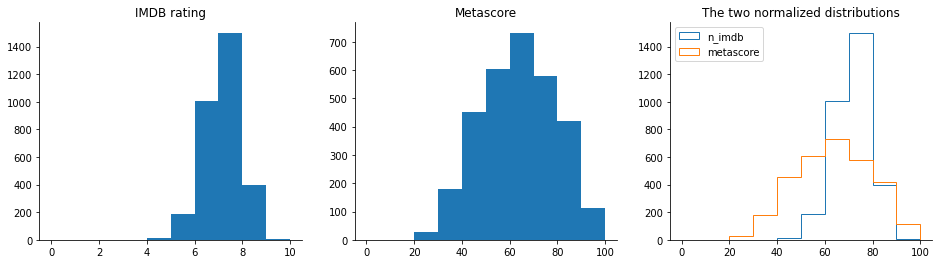

In [0]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'],bins=10, range=(0,10)) # range of bin = 1
ax1.set_title("IMDB rating")

ax2.hist(movie_ratings['metascore'], bins=10, range=(0,100)) # bin range = 100
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins=10, range=(0,100), histtype = 'step', label = 'n_imdb')
ax3.hist(movie_ratings['metascore'], bins=10, range=(0,100), histtype = 'step', label = 'metascore')
ax3.legend(loc = 'upper left')
ax3.set_title('The two normalized distributions')

for ax in fig.axes:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
plt.show()